## 3.1 a)Plot this data to see what it looks like.

In [1]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys


import gzip
import os
import copy
import random


from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [2]:
data = np.loadtxt('data1.txt',delimiter=' ')

In [3]:
data

array([[ 0.09762701,  0.43037873,  1.        ],
       [ 0.20552675,  0.08976637,  1.        ],
       [-0.1526904 ,  0.29178823,  1.        ],
       ...,
       [-0.17112225,  0.5825631 ,  0.        ],
       [ 0.44239623, -0.03978439,  1.        ],
       [ 0.28772807,  0.00354626,  1.        ]])

In [4]:
x1 = data[:,0]
x2 = data[:,1]
y = data[:,2]
X=data[:,0:2]

In [5]:
X

array([[ 0.09762701,  0.43037873],
       [ 0.20552675,  0.08976637],
       [-0.1526904 ,  0.29178823],
       ...,
       [-0.17112225,  0.5825631 ],
       [ 0.44239623, -0.03978439],
       [ 0.28772807,  0.00354626]])

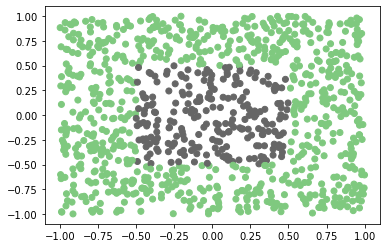

In [6]:
# create some random data grouped into three groups

# plot the data
fig = plt.figure()

plt.scatter(x1,x2, c = y, cmap='Accent')

plt.show()

## (b) Now use sklearn.tree.DecisionTreeClassifier to fit a decision tree to the data. What stopping criterion did you use? Display the tree using graphviz.

In [7]:
# using gini index as stopping criterion.

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=2)
treemodel = clf.fit(X, y)

In [34]:
clf1 = tree.DecisionTreeClassifier(max_depth=3)
treemodel1 = clf1.fit(X, y)

In [33]:
clf2 = tree.DecisionTreeClassifier(max_depth=None)
treemodel2 = clf2.fit(X, y)

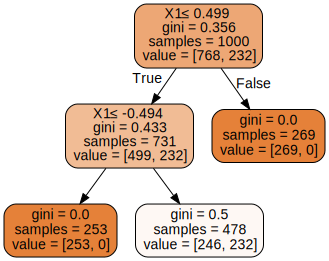

In [10]:
dot_data = tree.export_graphviz(treemodel, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

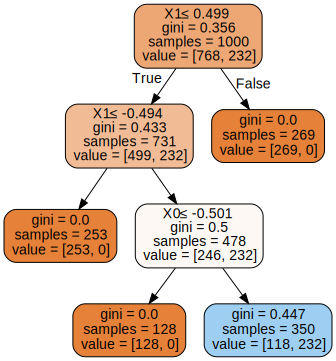

In [31]:
dot_data = tree.export_graphviz(treemodel1, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True, max_depth =3)
graph = graphviz.Source(dot_data)  
graph 

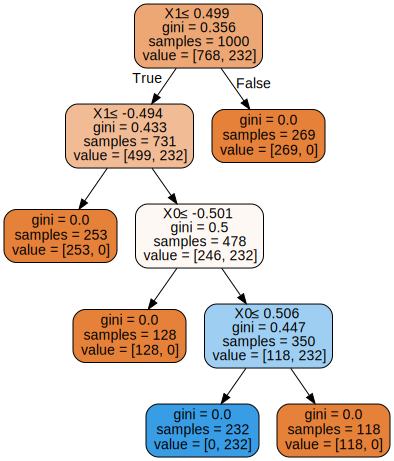

In [36]:
dot_data = tree.export_graphviz(treemodel2, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(dot_data)  
graph 

(c) Finally, fit boosted decision stumps to this data using sklearn.ensemble.AdaBoostClassifier. Use a relatively small number of stumps, and display each of them. 
Give a table showing how accuracy on the training data improves as each successive stump is added.


In [12]:
from sklearn.ensemble import AdaBoostClassifier


In [13]:
for stump in [1,2,3,4,5,6,10,100]:
    ada = AdaBoostClassifier(n_estimators=stump, random_state=0)
    ada.fit(X, y)
    score=ada.score(X,y)
    print(f" stump: {stump}, score: {score}")


 stump: 1, score: 0.768
 stump: 2, score: 0.768
 stump: 3, score: 0.882
 stump: 4, score: 1.0
 stump: 5, score: 1.0
 stump: 6, score: 1.0
 stump: 10, score: 1.0
 stump: 100, score: 1.0


Credit card fraud data. Download the data set at https://www.kaggle.com/mlg-ulb/creditcardfraud.
This data set has details of 284,807 credit card transactions, some of which are fraudulent. Each transaction is represented by 28 features (scrambled using PCA as a primitive kind of anonymization), and has a corresponding label (1 is fraudulent and 0 is legitimate).

(a) How many of the transactions are fraudulent? 
--492

Why might this be problematic when learning a classifier?
--if training data is mainly legit transactions, the fraudulent class counts are too small,so the result might overfit. So need to downsample the legit transactions



In [14]:
credit = pd.read_csv('creditcard.csv',delimiter=',')


In [15]:
credit.head()
credit.shape

(284807, 31)

In [16]:
print(credit.groupby(['Class']).count())
print('fraudulent: 492')

         Time      V1      V2      V3      V4      V5      V6      V7      V8  \
Class                                                                           
0      284315  284315  284315  284315  284315  284315  284315  284315  284315   
1         492     492     492     492     492     492     492     492     492   

           V9  ...     V20     V21     V22     V23     V24     V25     V26  \
Class          ...                                                           
0      284315  ...  284315  284315  284315  284315  284315  284315  284315   
1         492  ...     492     492     492     492     492     492     492   

          V27     V28  Amount  
Class                          
0      284315  284315  284315  
1         492     492     492  

[2 rows x 30 columns]
fraudulent: 492


(b) Downsample the legitimate transactions to make the data set more balanced.

In [17]:
df_class0 = credit[credit['Class']==0]
df_class1 = credit[credit['Class']==1]

In [18]:
import random

df_class0['counts'] = df_class0['Class'].map(df_class0['Class'].value_counts())
df_downsample = df_class0.sample(frac=492/284315, weights='counts', axis=0)

In [19]:
df_downsample
print(df_downsample.groupby(['Class']).count())


       Time   V1   V2   V3   V4   V5   V6   V7   V8   V9  ...  V21  V22  V23  \
Class                                                     ...                  
0       492  492  492  492  492  492  492  492  492  492  ...  492  492  492   

       V24  V25  V26  V27  V28  Amount  counts  
Class                                           
0      492  492  492  492  492     492     492  

[1 rows x 31 columns]


In [20]:
df_final = df_class1.append(df_downsample)

In [21]:
x2=df_final.iloc[:,1:29]
x2.shape

(984, 28)

In [22]:
y2=df_final.iloc[:,[-2]]
y2

,Class
541,1
623,1
4920,1
6108,1
6329,1
...,...
125537,0
149763,0
243423,0
66202,0


(c) Fit three kinds of classifier to the data:
• decision tree
• boosted decision stumps • random forest
In each case, use cross-validation to estimate the confusion matrix.

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


In [24]:
decisionTree=DecisionTreeClassifier()
decisionTree.fit(x2, y2)
pred_decisionTree = cross_val_predict(decisionTree, x2, y2, cv=10)
conf_mat = confusion_matrix(y2, pred_decisionTree)
conf_mat

array([[452,  40],
       [ 51, 441]])

In [25]:
gradientboost = GradientBoostingClassifier()
gradientboost.fit(x2, y2)
pred_gradientboost = cross_val_predict(gradientboost, x2, y2, cv=10)
conf_mat = confusion_matrix(y2, pred_gradientboost)
conf_mat

array([[472,  20],
       [ 42, 450]])

In [26]:
rf = RandomForestClassifier()
rf.fit(x2, y2)
pred_rf = cross_val_predict(rf, x2, y2, cv=10)
conf_mat = confusion_matrix(y2, pred_rf)
conf_mat

array([[480,  12],
       [ 47, 445]])

3. An experiment with PCA. For this problem, we’ll be using the animals with attributes data set. Go to
                            http://attributes.kyb.tuebingen.mpg.de
and, under “Downloads”, choose the “base package” (the very first file in the list). Unzip it and look over the various text files.

(a) This is a small data set that has information about 50 animals. The animals are listed in classes.txt. For each animal, the information consists of values for 85 features: does the animal have a tail, is it slow, does it have tusks, etc. The details of the features are in predicates.txt. The full data consists of a 50 × 85 matrix of real values, in predicate-matrix-continuous.txt. Load this real-valued array.

In [27]:
data_features = pd.read_fwf("Animals_with_Attributes/predicate-matrix-continuous.txt", header=None).values
print (data_features.shape)
# 50 is the number of samples n (number of animals)
# 85 is the number of features m (number of features)
data_features

(50, 85)


array([[-1.  , -1.  , -1.  , ...,  2.35,  9.7 ,  8.38],
       [39.25,  1.39,  0.  , ..., 58.64, 20.14, 11.39],
       [83.4 , 64.79,  0.  , ..., 15.77, 13.41, 15.42],
       ...,
       [63.57, 43.1 ,  0.  , ..., 35.95, 28.26,  5.  ],
       [55.31, 55.46,  0.  , ...,  5.04, 18.89, 72.99],
       [10.22, 21.53, 27.73, ...,  3.96, 14.05, 37.98]])

In [28]:
classes=pd.read_fwf("Animals_with_Attributes/classes.txt", header=None)
classes[[1]]

,1
0,antelope
1,grizzly+bear
2,killer+whale
3,beaver
4,dalmatian
5,persian+cat
6,horse
7,german+shepherd
8,blue+whale
9,siamese+cat


In [38]:
feature_names=pd.read_fwf("Animals_with_Attributes/predicates.txt", header=None)[1].values
classes_features = pd.DataFrame(data = data_features, columns = feature_names)
classes_features.index = classes
#classes_features.loc[['german+shepherd', 'collie', 'dalmatian']]
classes_features

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,water,tree,cave,fierce,timid,smart,group,solitary,nestspot,domestic
"(1, antelope)",-1.00,-1.00,-1.00,-1.00,12.34,0.00,0.00,0.00,16.11,9.19,...,0.00,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38
"(2, grizzly+bear)",39.25,1.39,0.00,74.14,3.75,0.00,0.00,0.00,1.25,0.00,...,7.64,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39
"(3, killer+whale)",83.40,64.79,0.00,0.00,1.25,0.00,0.00,0.00,68.49,32.69,...,79.49,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42
"(4, beaver)",19.38,0.00,0.00,87.81,7.50,0.00,0.00,0.00,0.00,7.50,...,65.62,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12
"(5, dalmatian)",69.58,73.33,0.00,6.39,0.00,0.00,0.00,0.00,37.08,100.00,...,1.25,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71
"(6, persian+cat)",19.38,50.09,29.44,8.98,38.19,0.00,0.00,0.00,17.93,6.25,...,1.25,2.64,0.00,13.98,43.69,38.62,6.25,36.60,9.17,72.88
"(7, horse)",44.90,42.91,4.44,69.41,35.94,0.00,0.00,0.00,22.29,15.80,...,2.22,0.00,0.00,15.51,35.39,37.28,36.47,16.78,14.62,59.33
"(8, german+shepherd)",43.54,15.88,5.00,54.16,26.82,3.12,2.50,0.38,48.78,11.59,...,3.75,0.00,2.50,57.44,10.00,57.53,12.50,35.11,16.53,68.55
"(9, blue+whale)",12.92,4.38,67.08,7.50,25.60,0.00,0.00,0.00,15.31,23.75,...,76.61,0.00,0.00,7.50,44.58,39.06,33.12,25.99,10.83,5.00
"(10, siamese+cat)",56.21,23.51,12.22,32.69,38.13,0.00,0.00,0.00,35.83,6.94,...,2.22,10.00,1.11,35.98,28.82,52.90,3.33,47.54,17.22,83.55


(b)
Lab 3 — Ensemble methods and informative projections
We would like to visualize these animals in 2-d. Show how to do this with a PCA projection from R85 to R2. Show the position of each animal, and label them with their names.
Python notes: You will need to make the plot larger by prefacing your code with
    from pylab import rcParams
    rcParams[’figure.figsize’] = 10, 10
(or try a different size if this doesn’t seem right).

In [39]:
from sklearn.decomposition import PCA
from pylab import rcParams


In [46]:
std = StandardScaler()
# Standardizing the features
x = std.fit_transform(data_features)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [47]:
finalDf = pd.concat([principalDf, classes[[1]]], axis=1)


In [71]:
finalDf['Class']=finalDf.iloc[:,-1]

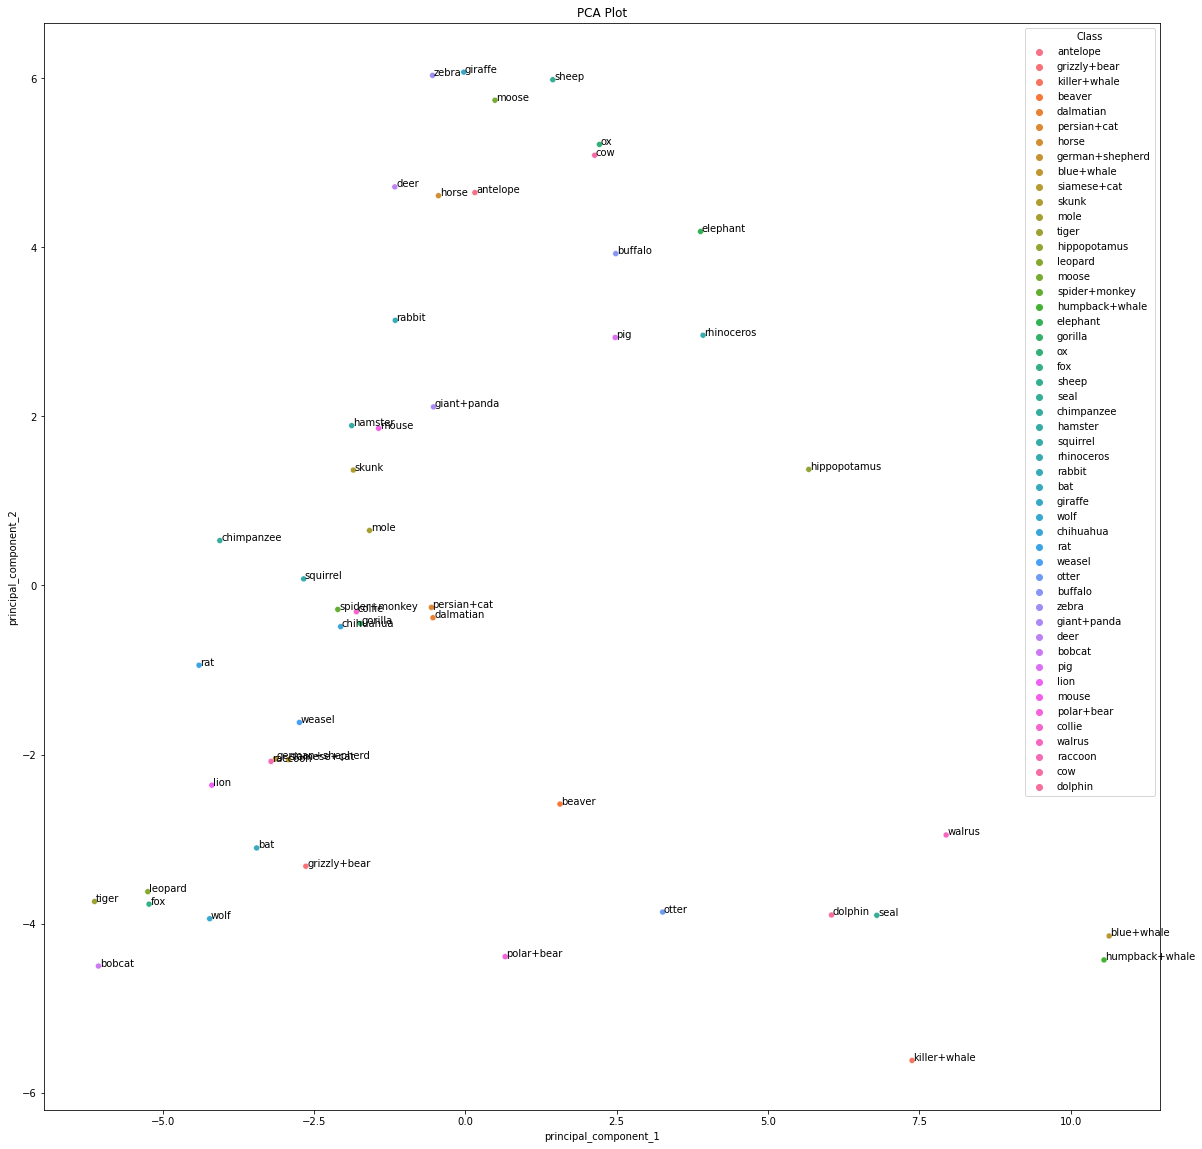

In [77]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.figure(figsize=(20, 20))



sns.scatterplot(data=finalDf, x='principal_component_1', y='principal_component_2', hue=finalDf.Class)

plt.title('PCA Plot')
# Set x-axis label
plt.xlabel('principal_component_1')
# Set y-axis label
plt.ylabel('principal_component_2')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(finalDf.principal_component_1, finalDf.principal_component_2, finalDf.Class, plt.gca())  

## MINI PROJECT 
First, download the Brown corpus (using nltk.corpus). This is a collection of text samples from a wide range of sources, with a total of over a million words. Calling brown.words() returns this text in one long list, which is useful.



In [82]:
import nltk.corpus
nltk.download('brown')


[nltk_data] Downloading package brown to /Users/kaylaxue/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [88]:
brown.words()


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [96]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

 Remove stopwords and punctuation, make everything lowercase, and count how often each word occurs. Use this to come up with two lists:
– A vocabulary V , consisting of a few thousand (e.g., 5000) of the most commonly-occurring words.
– A shorter list C of at most 1000 of the most commonly-occurring words, which we shall call
context words.


In [97]:
#lowercase the word
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaylaxue/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [98]:
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']

In [157]:
lower_words = [x.lower() for x in brown.words()]
pun_stop = punctuation + stopwords.words('english')
filter_words1 = [x for x in lower_words if x not in pun_stop]
filter_words = list(filter(lambda x: x.isalpha() and len(x) > 1, filter_words1))
filter_words[:10]

['fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'investigation',
 'recent',
 'primary',
 'election']

In [158]:
len(filter_words)

508631

In [159]:
#v-5000
#c-1000
import collections
import operator
wd_count = dict(collections.Counter(filter_words))
#words_cnt=filter_words.groupBy("word").count().sort(col("count").desc())
sorted_wd = sorted(wd_count.items(), key = operator.itemgetter(1), reverse = True)
# first 5000 most commonly-occuring words
V = [x[0] for x in sorted_wd[:5000]]
C = V[:1000]

In [104]:
print(V[:10])
print(C[:10])

['one', 'would', 'said', 'new', 'could', 'time', 'two', 'may', 'first', 'like']
['one', 'would', 'said', 'new', 'could', 'time', 'two', 'may', 'first', 'like']


In [ ]:
For each word w ∈ V , and each occurrence of it in the text stream, look at the surrounding window of
 four words (two before, two after):

### For each word w ∈ V , and each occurrence of it in the text stream, look at the surrounding window of
### four words (two before, two after):
### Keep count of how often context words from C appear in these positions around word w. That is, for
### w ∈ V,c ∈ C, define
### n(w, c) = # of times c occurs in a window around w.
### Using these counts, construct the probability distribution Pr(c|w) of context words around w (for each
### w ∈ V ), as well as the overall distribution Pr(c) of context words. These are distributions over C.


In [151]:
print (list(enumerate(filter_words[:10])))
print(filter_words[2:4])

[(0, 'fulton'), (1, 'county'), (2, 'grand'), (3, 'jury'), (4, 'said'), (5, 'friday'), (6, 'investigation'), (7, 'recent'), (8, 'primary'), (9, 'election')]
['grand', 'jury']


In [156]:
# locate each word of V in filter_words
positions = [x for x, n in enumerate(filter_words) if n == v_word] # locate each word of V in filter_words
positions

[57290,
 67400,
 165169,
 183410,
 208706,
 233126,
 236088,
 257519,
 257677,
 296476,
 321972,
 357046,
 357244,
 395495,
 400016,
 409085,
 430424,
 475607]

In [162]:
import itertools
def ls_uniq(seq): 
    checked = []
    for e in seq:
        if e not in checked:
            checked.append(e)
    return checked
c_words = []
for v_word in V:
    four_wd = []
    for i in positions:
        if i ==0:
            four_wd = filter_words[1:3]
        elif i == 1:
            four_wd = ([filter_words[0]] + filter_words[2:4])
        else:
            four_wd = (filter_words[(i-2):i] + filter_words[(i+1):(i+3)])
        four_wd_uniq = ls_uniq(four_wd)
        four_wd = four_wd + four_word_uniq
    four_wd_cnt = dict(collections.Counter(four_words))
    window_cnt = len(positions)
    for c_word in four_wd_cnt:
        if c_word in C:
            cword_fre = four_wd_cnt[c_word]
            Pr_cw = cword_fre/window_count
            c_words.append((v_word, c_word, cword_fre, window_count, Pr_cw))
cwords = pd.DataFrame(c_words)
cwords.columns = ['V','C','C_Count','total_Count','Pr_cw']
cwords.head()

,V,C,C_Count,total_Count,Pr_cw
0,one,provide,1,18,0.055556
1,one,easily,1,18,0.055556
2,one,yet,1,18,0.055556
3,one,time,2,18,0.111111
4,one,make,2,18,0.111111


In [163]:
cwords_uniq = list(cwords['C'].unique())
cwords_pro = {}
for cword in cwords_uniq:
    cwords_pro[cword] = filter_words.count(cword) / len(filter_words)
def cword_pro(x):
    return cwords_pro[x]
cwords['Pr_c'] = cwords['C'].apply(cword_pro)
cwords.head()

,V,C,C_Count,total_Count,Pr_cw,Pr_c
0,one,provide,1,18,0.055556,0.000425
1,one,easily,1,18,0.055556,0.000210
2,one,yet,1,18,0.055556,0.000824
3,one,time,2,18,0.111111,0.003142
4,one,make,2,18,0.111111,0.001561


 ## Represent each vocabulary item w by a |C|-dimensional vector Φ(w), whose c’th coordinate is:
 This is known as the (positive) pointwise mutual information, and has been quite successful in work on word embeddings.

In [165]:
import math
def max_log(row):
    f = row['Pr_cw']
    g = row['Pr_c']
    l = math.log(f/g)
    return max(0, l)
cwords['vecotor_w'] = cwords.apply(max_log, axis = 1)
cwords.head(10)


,V,C,C_Count,total_Count,Pr_cw,Pr_c,f_w,vecotor_w
0,one,provide,1,18,0.055556,0.000425,4.873828,4.873828
1,one,easily,1,18,0.055556,0.000210,5.576277,5.576277
2,one,yet,1,18,0.055556,0.000824,4.211235,4.211235
3,one,time,2,18,0.111111,0.003142,3.565745,3.565745
4,one,make,2,18,0.111111,0.001561,4.265170,4.265170
5,one,often,1,18,0.055556,0.000725,4.338310,4.338310
6,one,see,1,18,0.055556,0.001518,3.600122,3.600122
7,one,letter,1,18,0.055556,0.000285,5.272373,5.272373
8,one,could,1,18,0.055556,0.003148,2.870723,2.870723
9,one,heard,1,18,0.055556,0.000486,4.739718,4.739718



 Suppose we want a 100-dimensional representation. How would you achieve this?
• Investigate the resulting 100-dimensional embedding in two ways:
– Cluster the vocabulary into 100 clusters. Look them over; do they seem completely random, or is there some sense to them?
– Try finding the nearest neighbor of selected words. Do the answers make sense?

In [122]:
mutal_words = pd.pivot_table(cwords, index = 'V', columns = 'C', values = 'vecotor_w')
mutal_words.head()

C_Word,able,accepted,according,account,across,act,action,activities,activity,actual,...,writing,written,wrong,wrote,year,years,yes,yet,york,young
V_Word,,,,,,,,,,,,,,,,,,,,,
abandoned,NaN,NaN,NaN,NaN,NaN,4.275155,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.797542,NaN,NaN
able,3.082068,NaN,NaN,3.002026,NaN,2.118753,NaN,NaN,3.010609,NaN,...,3.002026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.810956
aboard,NaN,NaN,NaN,NaN,4.278695,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
mutal_words = mutal_words.fillna(0)
mutal_words.head()

C_Word,able,accepted,according,account,across,act,action,activities,activity,actual,...,writing,written,wrong,wrote,year,years,yes,yet,york,young
V_Word,,,,,,,,,,,,,,,,,,,,,
abandoned,0.000000,0.0,0.0,0.000000,0.000000,4.275155,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
abel,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
ability,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.797542,0.0,0.000000
able,3.082068,0.0,0.0,3.002026,0.000000,2.118753,0.0,0.0,3.010609,0.0,...,3.002026,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.810956
aboard,0.000000,0.0,0.0,0.000000,4.278695,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


## Nearest neighbor results.
Pick a collection of 25 words w ∈ V . For each w, return its nearest neighbor w′ ̸= w in V . A popular
distance measure to use for this is cosine distance:
1− Ψ(w)·Ψ(w′) .
∥Ψ(w)∥∥Ψ(w′)∥ Here are some suggestions for words you might choose:
communism, autumn, cigarette, pulmonary, mankind, africa, chicago, revolution, september, chemical, detergent, dictionary, storm, worship
Do the results make any sense?

In [167]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(mutal_words)



In [169]:
distances, indices = nbrs.kneighbors(mutal_words)

In [170]:
distances

array([[ 0.        , 31.01854811, 31.26477179, ..., 34.50789981,
        34.50888465, 34.52090404],
       [ 0.        , 30.86831685, 31.21526897, ..., 35.10413255,
        35.11387525, 35.11760603],
       [ 0.        , 39.15641209, 39.39478468, ..., 41.86316723,
        41.8826904 , 41.88906328],
       ...,
       [ 0.        , 37.73764266, 37.95853065, ..., 40.3704466 ,
        40.37390259, 40.37580998],
       [ 0.        , 27.32545084, 27.60463533, ..., 31.55513946,
        31.56842913, 31.57947107],
       [ 0.        , 30.23961517, 30.5902178 , ..., 34.62064037,
        34.6291138 , 34.64659147]])

In [171]:
indices

array([[   0, 3773, 3480, ..., 3484, 4109, 1542],
       [   1, 3773, 3480, ..., 2420, 4280,  572],
       [   2, 3773, 3480, ...,  658, 3155, 4454],
       ...,
       [4997, 3773, 3480, ..., 2557, 1102, 4781],
       [4998, 3773, 3480, ..., 3174, 4017, 3330],
       [4999, 3773, 3480, ..., 4433, 1694, 1303]])

In [172]:
nbrs.kneighbors_graph(mutal_words).toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Clustering.
Using the vectorial representation Ψ(·), cluster the words in V into 100 groups. Clearly specify what algorithm and distance function you using for this, and the reasons for your choices.
Look over the resulting 100 clusters. Do any of them seem even moderately coherent? Pick out a few of the best clusters and list the words in them.

In [143]:
clf=KMeans(init='k-means++', n_clusters=100, n_init=10)
clf.fit(mutal_words) #samples_features is a samples by features matrix

cluster = clf.cluster_centers_

y_kmeans = clf.predict(mutal_words)




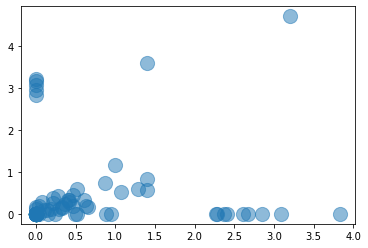

In [173]:
#plt.scatter(mutal_words[:, 0], mutal_words[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = cluster
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5)